<a href="https://colab.research.google.com/github/s26633/2526Z_wzs_POSI_MON1_11_s26633/blob/main/Cwiczenia3_s26633.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ćwiczenia 3

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('titanic.csv')

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


W tych zajęciach będziemy kontynuować pracę z analizą eksploracyjną danych (EDA).

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [ ]:
df['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


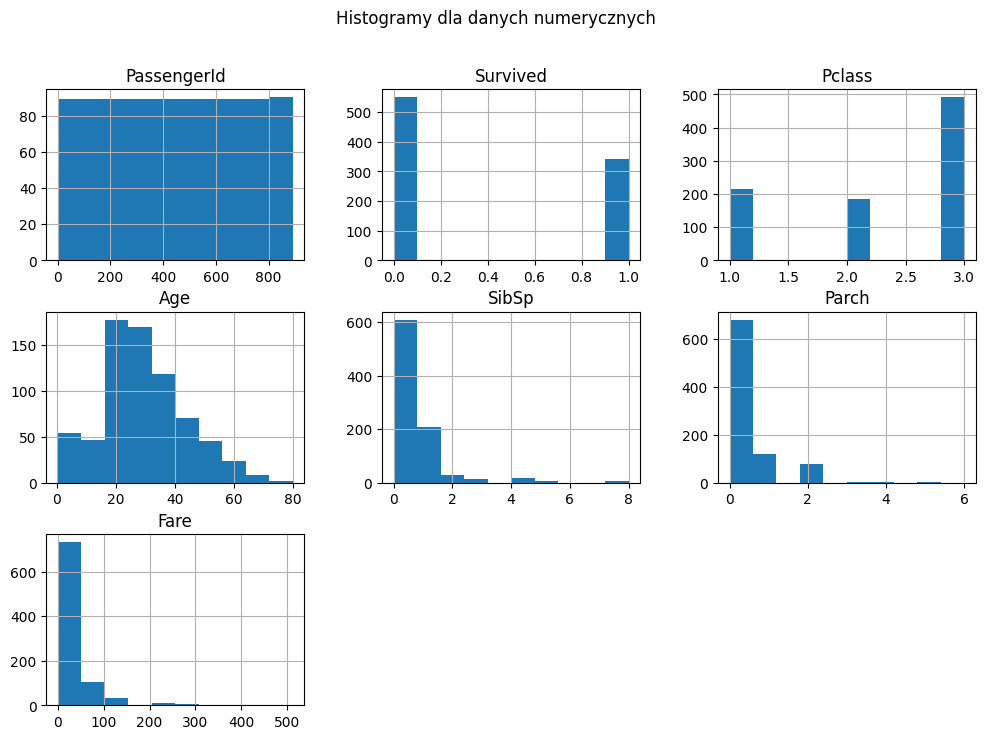

In [ ]:
import matplotlib.pyplot as plt

df.hist(figsize=(12, 8))
plt.suptitle('Histogramy dla danych numerycznych')
plt.show()

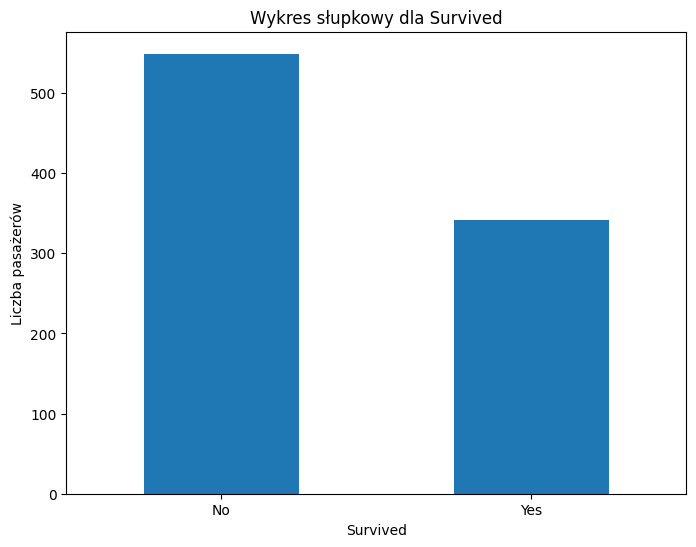

In [ ]:
plt.figure(figsize=(8, 6))
df['Survived'].value_counts().sort_index().plot(kind='bar')
plt.title('Wykres słupkowy dla Survived')
plt.xlabel('Survived')
plt.ylabel('Liczba pasażerów')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)
plt.xticks(rotation=0)
plt.show()

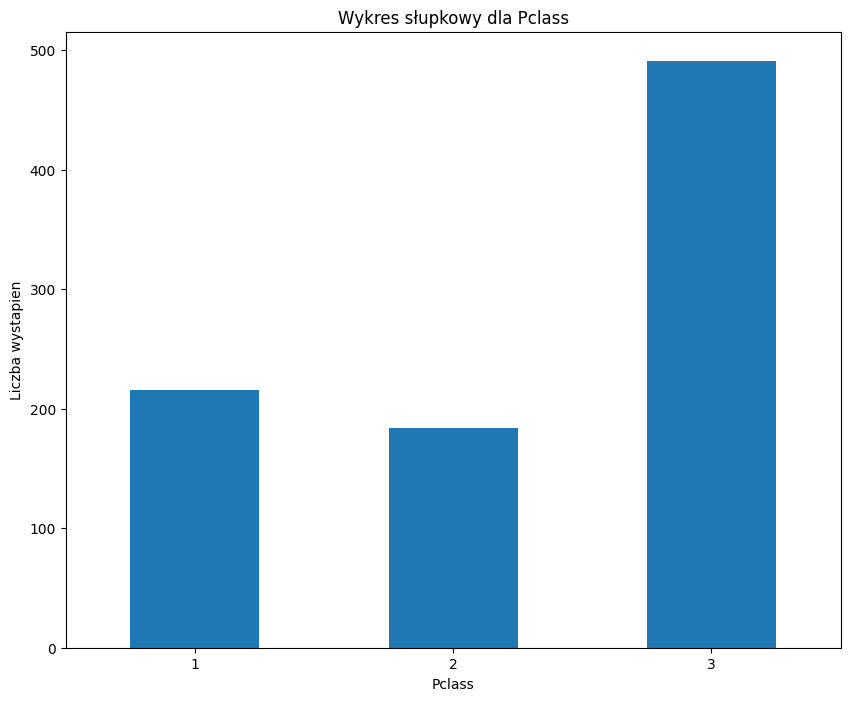

In [ ]:
plt.figure(figsize=(10,8))
df['Pclass'].value_counts().sort_index().plot(kind='bar')
plt.title('Wykres słupkowy dla Pclass')
plt.xlabel('Pclass')
plt.ylabel('Liczba wystapien')
plt.xticks(rotation=0)
plt.show()

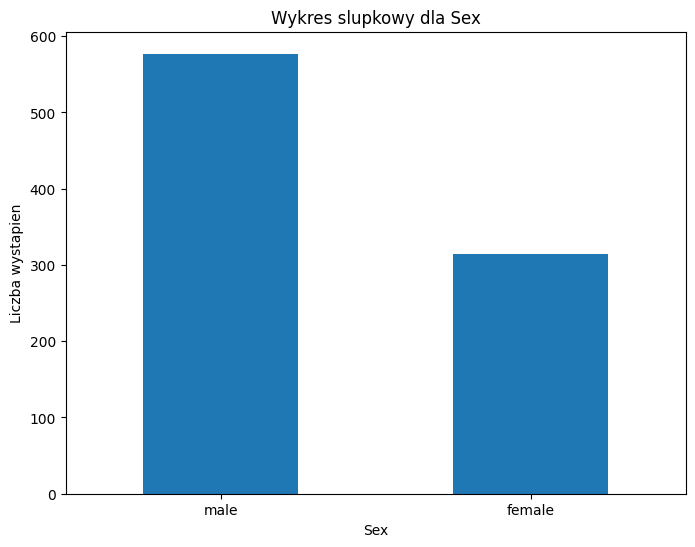

In [ ]:
plt.figure(figsize=(8,6))
df['Sex'].value_counts().plot(kind='bar')
plt.title('Wykres slupkowy dla Sex')
plt.xlabel('Sex')
plt.ylabel('Liczba wystapien')
plt.xticks(rotation=0)
plt.show()


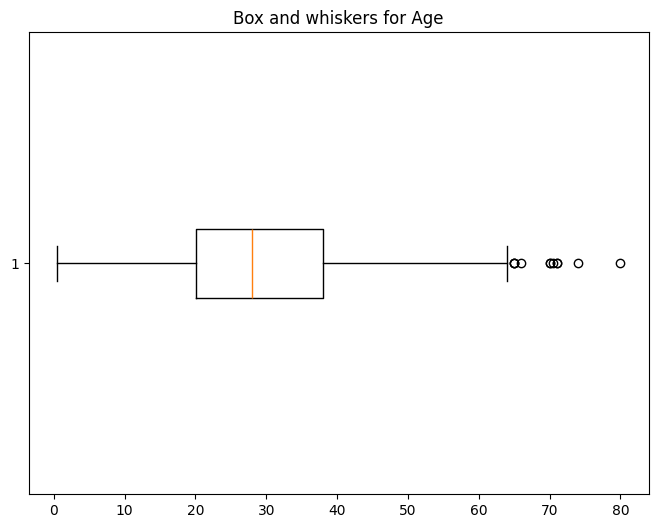

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['Age'].dropna(), vert = False)
plt.title('Wykres pudełkowy dla Age')
plt.show()

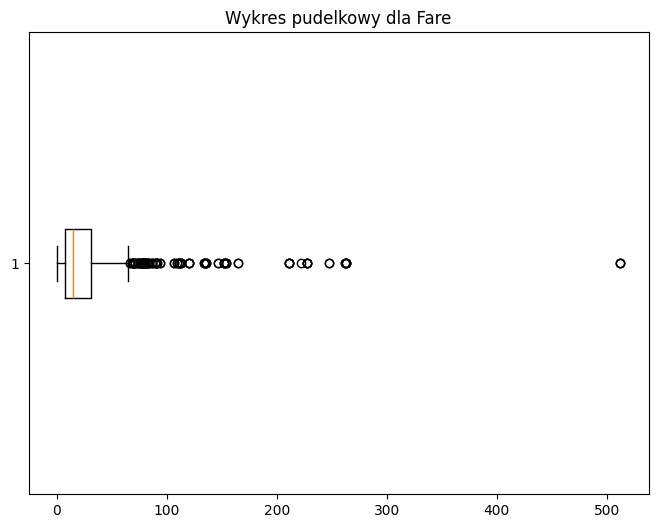

In [ ]:
plt.figure(figsize=(8,6))
plt.boxplot(df['Fare'].dropna(), vert = False)
plt.title('Wykres pudelkowy dla Fare')
plt.show()

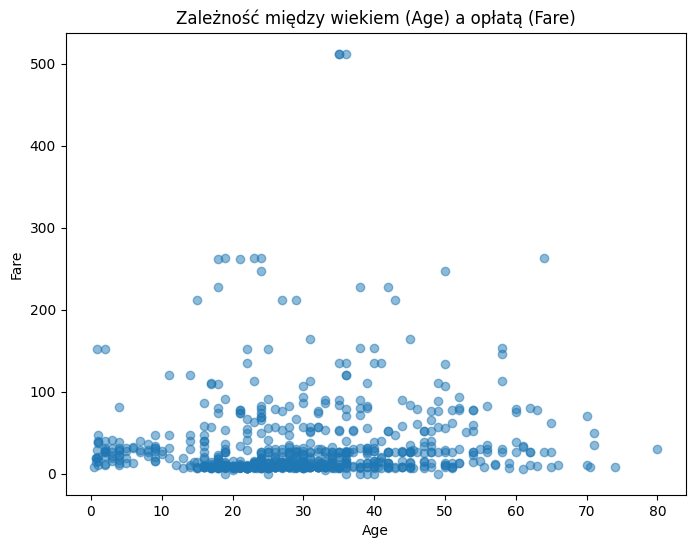

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Fare'], alpha=0.5)
plt.title('Zależność między wiekiem (Age) a opłatą (Fare)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()


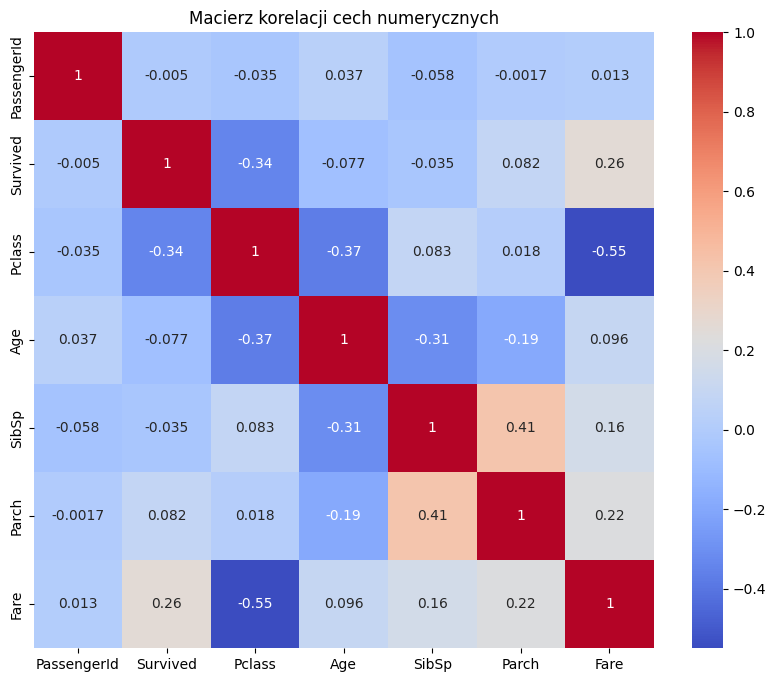

In [ ]:
import seaborn as sns

numeric_df = df.select_dtypes(include=['int64', 'float64'])

corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Macierz korelacji cech numerycznych')
plt.show()


Płeć i klasa podróży mają kluczowy wpływ na przeżycie: kobiety i pasażerowie z najwyzszej (3) klasy mieli znacznie większe szanse.

Wiek ma umiarkowany wpływ, dzieci i młodsze osoby częściej przeżywały.

Opłata koreluje z przeżyciem, ale wynika to głównie z klasy podróży.



## Zadanie
Twoje zadanie polega na przeprowadzeniu analizy eksploracyjnej danych (**EDA**) na zbiorze danych Titanic.

### Załaduj zbiór danych
- Załaduj zbiór danych (`titanic.csv`).

### Zrozum dane
- **Podgląd danych:** Zobacz pierwsze kilka wierszy, aby zapoznać się z danymi. Użyj metody `.head()` lub jej odpowiednika.
- **Typy danych:** Sprawdź typy danych w każdej kolumnie (np. numeryczne, kategoryczne). Użyj `.info()`, aby sprawdzić obecność brakujących wartości oraz nietypowe typy danych.
- **Sprawdzenie brakujących danych:** Zidentyfikuj kolumny zawierające brakujące dane. Omów sposób ich obsługi (np. imputacja, usuwanie wierszy/kolumn).

### Statystyki podsumowujące
- **Statystyki opisowe:** Oblicz podstawowe statystyki podsumowujące dla kolumn numerycznych (średnia, mediana, odchylenie standardowe, itp.).
- **Dane kategoryczne:** Użyj `.value_counts()`, aby zbadać częstotliwość występowania poszczególnych kategorii w kolumnach kategorycznych, takich jak 'Survived', 'Embarked', itp.

### Wizualizacja danych:

- **Analiza jednozmiennowa:**
  - Dla danych numerycznych użyj histogramów lub wykresów pudełkowych, aby zwizualizować rozkład.
  - Dla danych kategorycznych użyj wykresów słupkowych, aby pokazać częstotliwość różnych kategorii.

- **Analiza dwuzmiennowa:**
  - Zbadaj zależności między dwiema zmiennymi (np. wiek a opłata, przeżycie a płeć, itp.). Użyj wykresów punktowych, wykresów par czy macierzy korelacji.
  - Zwizualizuj wpływ cech kategorycznych (np. płeć, klasa) na zmienną docelową 'Survived'. Użyj wykresów słupkowych, wykresów skumulowanych lub wykresów słupkowych stosunkowych.

- **Macierz korelacji:** Jeśli to istotne, stwórz mapę cieplną, aby zbadać korelacje między cechami numerycznymi.

### Obsługa wartości odstających i anomalii:

- Zidentyfikuj i omów potencjalne wartości odstające lub anomalie w zbiorze danych.
- Zdecyduj, jak będziesz traktować te wartości odstające, jeśli będzie to konieczne.

### Dokumentacja wyników:
- Podsumuj kluczowe wnioski z przeprowadzonej analizy EDA, w tym zauważone wzorce lub zależności, które mogą być szczególnie ważne dla przewidywania przeżycia.
- Dostarcz wizualizacje wspierające Twoje wnioski.

### Ważne:

**Bądź szczegółowy:** Staraj się odkryć jak najwięcej informacji o danych.

**Bądź metodyczny:** Podążaj za logiczną sekwencją kroków — najpierw eksploracja, potem wizualizacja, a na końcu wnioski.

**Bądź klarowny:** Dokumentuj swoje kroki w sposób jasny, aby ktoś nieznający Twojej analizy mógł zrozumieć Twoje wnioski.
